In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

## Plot vectors

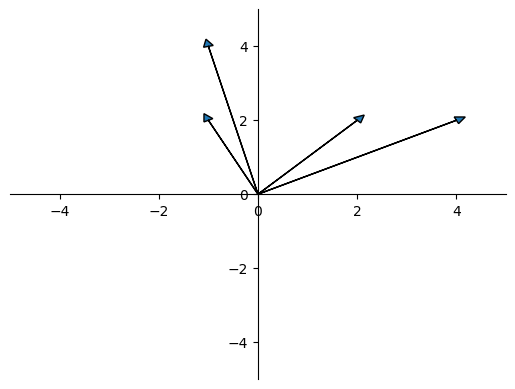

In [2]:
fig, ax = plt.subplots()
ax.axis([-5,5,-5,5])

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

vectors = [[-1,2], [4,2], [-1,4], [2,2]]

for vector in vectors:
    ax.arrow(0,0, vector[0], vector[1], head_width=0.2, head_length=0.2)

Text(0.5, 0.92, '3d vector plot')

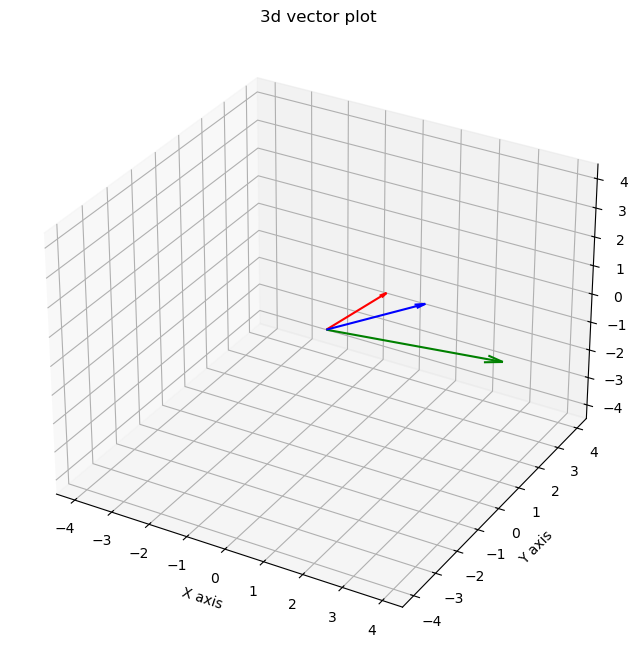

In [3]:
vectors = [[1,1,1], [3,3,-2], [2,1,1]]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

startx = [0] * len(vectors)
starty = [0] * len(vectors)
startz = [0] * len(vectors)

endx = [ v[0] for v in vectors ]
endy = [ v[1] for v in vectors ]
endz = [ v[2] for v in vectors ]

plt.quiver(startx, starty, startz, endx, endy, endz, color=['r', 'g', 'b'], arrow_length_ratio=0.1)

max_range = max(np.max(np.abs(endx)), np.max(np.abs(endy)), np.max(np.abs(endz)))
limits = 1.5*max_range

ax.set_xlim( -limits, limits)
ax.set_ylim( -limits, limits)
ax.set_zlim( -limits, limits)

ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

ax.set_title("3d vector plot")

## Lengths and unit vectors

In [4]:
def length_vector( vector ):
    return np.sqrt( ( np.array(vector) * np.array(vector) ).sum() )

def unit_vector( vector ):
    return np.array(vector) / np.sqrt( ( np.array(vector) * np.array(vector) ).sum() )

def dot_product( vector1, vector2 ):
    return (np.array(vector1) * np.array(vector2)).sum()

def angle_between_vectors( vector1, vector2 ):
    return np.degrees(np.arccos( dot_product(vector1, vector2) / (length_vector(vector1) * length_vector(vector2)) ))

## Implementing matrix rotation

$$
    \begin{bmatrix}
        \cos(\theta) & -\sin(\theta) \\
        \sin(\theta) & \cos(\theta)
    \end{bmatrix}
    \times 
    \begin{bmatrix}
        a \\ b
    \end{bmatrix} 
    = 
    \begin{bmatrix}
        a \cdot \cos(\theta) \\
        b \cdot \sin(\theta)
    \end{bmatrix}
$$

Vector 0 [2. 0.]
119.99999999999999
Vector 1 [-1.          1.73205081]
119.99999999999999
Vector 2 [-1.         -1.73205081]
120.00000000000001


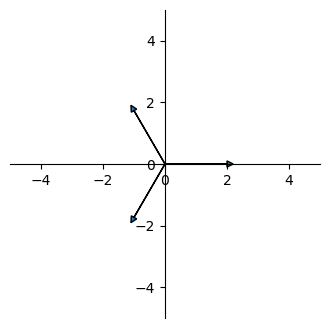

In [5]:
fig, ax = plt.subplots(figsize = (4,4))
ax.axis([-5,5,-5,5])

ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

vector = np.array( [[2,0]] )

angle = np.deg2rad(120)
rotation = [ [np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)] ]

rotation_vector1 = np.array(rotation) @ vector[0]
rotation_vector2 = np.array(rotation) @ rotation_vector1
vector = np.concatenate((vector, rotation_vector1[np.newaxis, :], rotation_vector2[np.newaxis, :]))

for i, v in enumerate(vector):
    ax.arrow(0,0, v[0], v[1], head_width=0.2, head_length=0.2)
    print( f'Vector {i}',  v )
    print( angle_between_vectors(v, vector[i+1] if i<2 else vector[0] ) )

In [6]:
difference_matrix = np.array([[1,0,-1], [-1,1,0], [0,-1,1]])
x = np.array([1,4,9])
print( difference_matrix @ x )

[-8  3  5]


## Multiply by Markov Matrix

In [7]:
markov_matrix = np.array([[0.8, 0.3],[0.2, 0.7]])
u = np.array([1,0])
v = np.array([0,1])

for i in range(10):
    u = markov_matrix @ u
    v = markov_matrix @ v
    print(f'\nIteration {i+1}, :')
    print(f'u{i+1}: {u}' )
    print(f'v{i+1}: {v}' )    

s = u
print( "\n\n",markov_matrix @ s )


Iteration 1, :
u1: [0.8 0.2]
v1: [0.3 0.7]

Iteration 2, :
u2: [0.7 0.3]
v2: [0.45 0.55]

Iteration 3, :
u3: [0.65 0.35]
v3: [0.525 0.475]

Iteration 4, :
u4: [0.625 0.375]
v4: [0.5625 0.4375]

Iteration 5, :
u5: [0.6125 0.3875]
v5: [0.58125 0.41875]

Iteration 6, :
u6: [0.60625 0.39375]
v6: [0.590625 0.409375]

Iteration 7, :
u7: [0.603125 0.396875]
v7: [0.5953125 0.4046875]

Iteration 8, :
u8: [0.6015625 0.3984375]
v8: [0.59765625 0.40234375]

Iteration 9, :
u9: [0.60078125 0.39921875]
v9: [0.59882812 0.40117187]

Iteration 10, :
u10: [0.60039063 0.39960938]
v10: [0.59941406 0.40058594]


 [0.60019531 0.39980469]


## ELimintation from A to U

In [8]:
A = np.array([[2,4,-2], [4,9,-3], [-1,-3,7]], dtype=np.longdouble)
b = np.array([2,8,10])
c = np.concatenate((A, b[:, np.newaxis]), axis=1)

In [9]:
def gaussian(A):
    for j in range(len(A[0,:])):
        for i in range(len(A)):
            if i >= j:
                if A[i,j] != 0 and i==j :
                    A[i,:] = A[i,:] / A[i,i] 
                elif A[i,j] != 0 :
                    A[i,:] = A[i,:] - A[j,:] * ( A[i,j] / A[j,j] )
    return A
                
print ( gaussian(c) )

[[ 1.          2.         -1.          1.        ]
 [ 0.          1.          1.          4.        ]
 [ 0.          0.          1.          2.14285714]]


## Elimination Matrix and Row Exchange Matrix

In [10]:
matrix = np.array([[2,4,-2],[4,9,-3],[-2,-3,7]])

elimination = np.array([[1,0,0],[-2,1,0],[0,0,1]])
rowexchange = np.array([[1,0,0],[0,0,1],[0,1,0]])
augmented = np.array([2,8,10])

In [11]:
print("\nOriginal:\n", matrix)
print("\nElimination:\n", elimination @ matrix)
print("\nElimination:\n", rowexchange @ matrix)
print("\nAugmented matrix:\n", np.concatenate((matrix, augmented[:,np.newaxis]), axis=1))


Original:
 [[ 2  4 -2]
 [ 4  9 -3]
 [-2 -3  7]]

Elimination:
 [[ 2  4 -2]
 [ 0  1  1]
 [-2 -3  7]]

Elimination:
 [[ 2  4 -2]
 [-2 -3  7]
 [ 4  9 -3]]

Augmented matrix:
 [[ 2  4 -2  2]
 [ 4  9 -3  8]
 [-2 -3  7 10]]


## Inverse Matrix

### $A^-1$ exists if $A$ has a full set of $n$ pivots

In [12]:
A = np.array([[2,4,-2], [4,9,-3], [-1,-3,7]], dtype=np.longdouble)
b = np.array(np.eye(np.shape(A)[0]))
c = np.concatenate((A, np.eye(np.shape(A)[0])), axis=1)

print("Original Augmented matrix: \n", c, "\n")

def inverse(A):
    n = np.shape(A)
    for j in range(len(A[0,:])):
        for i in range(len(A)):
            if ( j <= np.shape(A)[0]-1 ):
                if A[i,j] != 0 and i==j :
                    A[i,:] = A[i,:] / A[i,i] 
                elif A[i,j] != 0 :
                    A[i,:] = A[i,:] - A[j,:] * ( A[i,j] / A[j,j] )
    return A, n

print ( "Reduced Row Echelon Form:")
print ( inverse(c)[0] )
print ( "\nInverse matrix:" )
print ( inverse(c)[0][:,inverse(c)[1][0]:] )

Original Augmented matrix: 
 [[ 2.  4. -2.  1.  0.  0.]
 [ 4.  9. -3.  0.  1.  0.]
 [-1. -3.  7.  0.  0.  1.]] 

Reduced Row Echelon Form:
[[ 1.          0.          0.          3.85714286 -1.57142857  0.42857143]
 [ 0.          1.          0.         -1.78571429  0.85714286 -0.14285714]
 [ 0.          0.          1.         -0.21428571  0.14285714  0.14285714]]

Inverse matrix:
[[ 3.85714286 -1.57142857  0.42857143]
 [-1.78571429  0.85714286 -0.14285714]
 [-0.21428571  0.14285714  0.14285714]]


## LU factorization

In [13]:
matrix = np.array([[1,2],[3,4]])
matrix = np.array(([[2,1,0], [1,2,1], [0,1,2]]), dtype=np.float64)
matrix = np.array([[1,1,1,1], [1,2,3,4], [1,3,6,10], [1,4,10,20]], dtype=np.float64)

def ldu( matrix ):
    l = np.eye(np.shape(matrix)[0])
    u = matrix.copy()
    d = np.zeros((np.shape(matrix)[0], np.shape(matrix)[0]), dtype=np.float64)
    for j in range(len(matrix[0,:])):
        for i in range(len(matrix)):
             if ( i >= j  ): 
                if u[i,j] != 0 and i != j :
                    factor = u[i,j] / u[j,j]
                    u[i,:] = u[i,:] - u[j,:] * ( factor )
                    l[i,j] = factor

    for i in range(np.shape(l)[0]):
        d[i,i] = u[i,i]
        u[i,:] = u[i,:] / u[i,i]
        
    return np.round(l, 2), np.round(d, 2), np.round(u, 2)

print( "Original matrix:\n", matrix )
print( "\nL:\n",ldu(matrix)[0] )
print( "\nD:\n",ldu(matrix)[1] )
print( "\nU:\n",ldu(matrix)[2] )

print( "\n LDU", ldu(matrix)[0] @ ldu(matrix)[1] @ ldu(matrix)[2] )

Original matrix:
 [[ 1.  1.  1.  1.]
 [ 1.  2.  3.  4.]
 [ 1.  3.  6. 10.]
 [ 1.  4. 10. 20.]]

L:
 [[1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 2. 1. 0.]
 [1. 3. 3. 1.]]

D:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

U:
 [[1. 1. 1. 1.]
 [0. 1. 2. 3.]
 [0. 0. 1. 3.]
 [0. 0. 0. 1.]]

 LDU [[ 1.  1.  1.  1.]
 [ 1.  2.  3.  4.]
 [ 1.  3.  6. 10.]
 [ 1.  4. 10. 20.]]


## Transposes and Permutations

Sum $ (A+B)^T = A^T + B^T$

Product $ (AB)^T = B^TA^T $

Inverse $ (A^{-1})^T = (A^T)^{-1}$

In [14]:
np.array([[1,0],[6,1]]).T

array([[1, 6],
       [0, 1]])

Inside: The dot product or inner product is $x^Ty$ $\hspace{2cm}$ $(1 \times n)(n \times 1)$

Outside: The rank one product or outer product is $xy^T$ $\hspace{0.7cm}$ $(n \times 1)(1 \times n)$

## Symetric matrices

In [15]:
def is_symmetric(matrix):
    return not (False in (matrix == matrix.T))

def convert_matrix(matrix, sideT="l"):
    if sideT == "l":
        return np.array(matrix).T @ np.array(matrix)
    elif sideT == "r":
        return np.array(matrix) @ np.array(matrix).T

a = np.array([[1,2],[2,1]])
b = np.array([[1,2,3], [4,5,6]])
convert = convert_matrix(b, "r")
print(convert)
is_symmetric(convert)

[[14 32]
 [32 77]]


True

In [16]:
a = np.array([[1,2], [2,7]])
for b in ldu(a):
    print(b, "\n")

[[1. 0.]
 [2. 1.]] 

[[1. 0.]
 [0. 3.]] 

[[1 2]
 [0 1]] 



In [17]:
p = np.zeros((3,3))
p[0,2] = p[1,0] = p[2,1] = 1
print(p)
print("\n",p.T)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]

 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


## Rank

In [18]:
c = np.array([[1,1,2,4], [1,2,2,5], [1,3,2,6]])
c = np.array([[1,3,10], [0,0,20], [3,9,10]])

def rank(A):
    rank = 0
    for j in range( np.shape(c)[1] ):
        for i in range(len(A)):
            if i >= j and A[i,j] != 0:
                if i==j and A[i,j] != 1 :
                    A[i,:] = A[i,:] / A[i,i]
                elif i!=j and A[i,j] != 0 and A[j,j] != 0 :
                    A[i,:] = A[i,:] - A[j,:] * ( A[i,j] / A[j,j] )
    for i in range(len(A)):
        if A[i,i] == 1: rank += 1
    return A, rank

print ( rank(c) )

(array([[ 1,  3, 10],
       [ 0,  0, 20],
       [ 0,  0,  1]]), 2)


## Projections

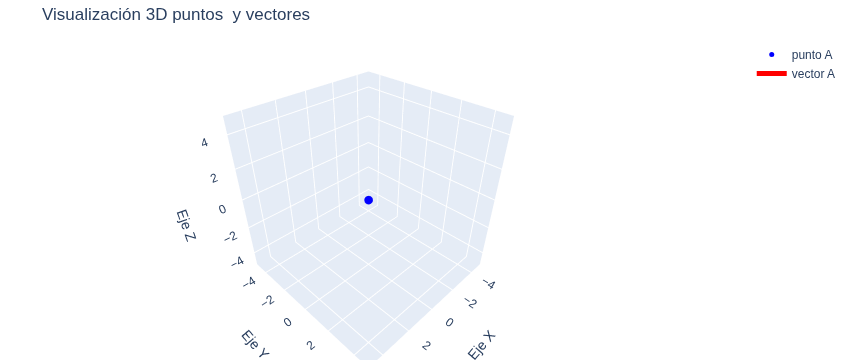

In [35]:
puntoA = np.array([3,3,3])
puntoB = np.array([3,3,3])

fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x = [puntoA[0]], y = [puntoA[1]], z = [puntoA[2]], mode='markers', marker=dict(size=5, color='blue'), name='punto A'
))

fig.add_trace(go.Scatter3d(
    x = [0, puntoA[0]], y = [0, puntoA[1]], z = [0, puntoA[2]], mode='lines', line=dict(width=5, color='red'), name='vector A'
))

fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=10, range=[-5,5],),
        yaxis = dict(nticks=10, range=[-5,5],),
        zaxis = dict(nticks=10, range=[-5,5],),
        aspectmode='cube',
        xaxis_title='Eje X',
        yaxis_title='Eje Y',
        zaxis_title='Eje Z'
    ),
    title='Visualización 3D puntos  y vectores',
    margin=dict(r=0, l=0, b=0, t=40),
    scene_aspectmode='data'
)

fig.show()